# Machine Learning for data analysis

## Topic : LASSO Regression
Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. 
The lasso does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero. Variables with a regression coefficient equal to zero after the shrinkage process are excluded from the model. Variables with non-zero regression coefficients variables are most strongly associated with the response variable. Explanatory variables can be either quantitative, categorical or both.

### Run a Lasso regression
Your assignment is to run a lasso regression analysis using k-fold cross validation to identify a subset of predictors from a larger pool of predictor variables that best predicts a quantitative response variable.

### What to submit:
Following completion of the steps described above, create a blog entry where you submit syntax used to run a lasso regression (copied and pasted from your program) along with corresponding output and a brief written summary. Please note that your reviewers should NOT be required to download any files in order to complete the review.

If your data set has a relatively small number of observations, you do not need to split into training and test data sets. You can provide your rationale for not splitting your data set in your written summary.

### Data Set : Melbourne Housing Snapshot

#### Context
The objective is to use the publicly available Melbourne housing market data to gauge insights and snap up a reasonably priced 2-bedroom unit.

#### Content
It was scraped from publicly available results posted every week from Domain.com.au. He cleaned it well, and now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

Target Variable: 
- Price: Price in dollars

Explanatory variable:
- Rooms: Number of rooms
- Method: Method of Selling (S - property sold; PI - property passed in; SA - sold after auction)
- Type: (h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse;)
- Distance: Distance from CBD
- Regionname: General Region (West, North West, North, North east …etc)
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size
- BuildingArea: Building Size

In [1]:
#Import useful libraries
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV

import warnings # ignore warning message
warnings.filterwarnings('ignore')

### 1. Data Management  

In [2]:
#load data from csv file 
housedata = pd.read_csv('melb_data.csv')

#remove rows with null values 
housedata=housedata.dropna(axis=0)

In [3]:
#drop unnecessary columns 
housedata=housedata.drop(['Suburb',"Address","SellerG","Date","Propertycount",'CouncilArea'],axis=1)

In [4]:
housedata.dtypes

Rooms             int64
Type             object
Price           float64
Method           object
Distance        float64
Postcode        float64
Bedroom2        float64
Bathroom        float64
Car             float64
Landsize        float64
BuildingArea    float64
YearBuilt       float64
Lattitude       float64
Longtitude      float64
Regionname       object
dtype: object

In [5]:
# generate indicator values for categorical variables using get_dummies
housedata = pd.get_dummies(housedata, columns=["Type","Method","Regionname"])

In [6]:
#select predictor variables and target variable as separate data sets  

target = housedata.Price

predvar= housedata.drop(['Price'],axis=1)

In [7]:
housedata.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Type_h', 'Type_t', 'Type_u', 'Method_PI', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB', 'Regionname_Eastern Metropolitan',
       'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object')

In [8]:
#in LASSO regression, predictors need to the same scale 
predictors=predvar.copy()

from sklearn import preprocessing
# standardize predictors to have mean=0 and sd=1
predictors['Rooms']=preprocessing.scale(predictors['Rooms'].astype('float64'))
predictors['Distance']=preprocessing.scale(predictors['Distance'].astype('float64'))
predictors['Postcode']=preprocessing.scale(predictors['Postcode'].astype('float64'))
predictors['Bathroom']=preprocessing.scale(predictors['Bathroom'].astype('float64'))
predictors['Car']=preprocessing.scale(predictors['Car'].astype('float64'))
predictors['Landsize']=preprocessing.scale(predictors['Landsize'].astype('float64'))
predictors['BuildingArea']=preprocessing.scale(predictors['BuildingArea'].astype('float64'))
predictors['YearBuilt']=preprocessing.scale(predictors['YearBuilt'].astype('float64'))
predictors['Lattitude']=preprocessing.scale(predictors['Lattitude'].astype('float64'))
predictors['Type_h']=preprocessing.scale(predictors['Type_h'].astype('float64'))
predictors['Type_t']=preprocessing.scale(predictors['Type_t'].astype('float64'))
predictors['Type_u']=preprocessing.scale(predictors['Type_u'].astype('float64'))
predictors['Method_PI']=preprocessing.scale(predictors['Method_PI'].astype('float64'))
predictors['Method_S']=preprocessing.scale(predictors['Method_S'].astype('float64'))
predictors['Method_SA']=preprocessing.scale(predictors['Method_SA'].astype('float64'))
predictors['Method_SP']=preprocessing.scale(predictors['Method_SP'].astype('float64'))
predictors['Method_VB']=preprocessing.scale(predictors['Method_VB'].astype('float64'))
predictors['Regionname_Eastern Metropolitan']=preprocessing.scale(predictors['Regionname_Eastern Metropolitan'].astype('float64'))
predictors['Regionname_Eastern Victoria']=preprocessing.scale(predictors['Regionname_Eastern Victoria'].astype('float64'))
predictors['Regionname_Northern Metropolitan']=preprocessing.scale(predictors['Regionname_Northern Metropolitan'].astype('float64'))
predictors['Regionname_Northern Victoria']=preprocessing.scale(predictors['Regionname_Northern Victoria'].astype('float64'))
predictors['Regionname_South-Eastern Metropolitan']=preprocessing.scale(predictors['Regionname_South-Eastern Metropolitan'].astype('float64'))
predictors['Regionname_Southern Metropolitan']=preprocessing.scale(predictors['Regionname_Southern Metropolitan'].astype('float64'))
predictors['Regionname_Western Metropolitan']=preprocessing.scale(predictors['Regionname_Western Metropolitan'].astype('float64'))
predictors['Regionname_Western Victoria']=preprocessing.scale(predictors['Regionname_Western Victoria'].astype('float64'))

In [9]:
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                     test_size=.3, random_state=123)

### 2. Modeling and predictions

In [10]:
# specify the lasso regression model
#Least Angle Regression (LAR) => starts with no predictors in the model and adds a predictor at each step
#Here, we use 10 (k-fold); only use precompute when the data is really huge
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

#obs: those with 0 will be removed from the mode

{'Rooms': 115828.38839564222,
 'Distance': -232393.00108618484,
 'Postcode': 13041.374184356919,
 'Bedroom2': 9607.916885327193,
 'Bathroom': 135915.09922930758,
 'Car': 51297.67522054297,
 'Landsize': 22725.64427446007,
 'BuildingArea': 121211.8582575808,
 'YearBuilt': -103739.9590707548,
 'Lattitude': -44525.08794953783,
 'Longtitude': 611792.93654649,
 'Type_h': 90834.54453855618,
 'Type_t': 0.0,
 'Type_u': -71940.19647976081,
 'Method_PI': -13529.956189049399,
 'Method_S': 20907.792996012366,
 'Method_SA': -1146.5234390185165,
 'Method_SP': 0.0,
 'Method_VB': -4462.269003353654,
 'Regionname_Eastern Metropolitan': 0.0,
 'Regionname_Eastern Victoria': 0.0,
 'Regionname_Northern Metropolitan': -53710.504140722885,
 'Regionname_Northern Victoria': 25437.52532337992,
 'Regionname_South-Eastern Metropolitan': 19709.94564294175,
 'Regionname_Southern Metropolitan': 91545.84667776234,
 'Regionname_Western Metropolitan': -47468.38295313565,
 'Regionname_Western Victoria': 11852.70424028483

### 3. Evaluation

Text(0.5,1,'Regression Coefficients Progression for Lasso Paths')

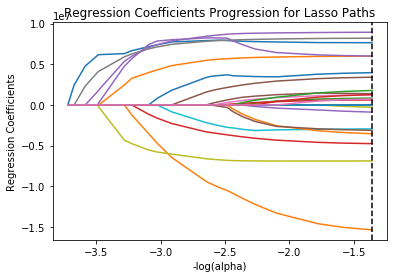

In [11]:
# plot coefficient progression
# shows the relative importance of the predictor selected at any step of the selection process 
# reggression coefficients changed with the addition of a new predictor at each step (where each variable entered the model)

m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)

#plot a dash line
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

Text(0.5,1,'Mean squared error on each fold')

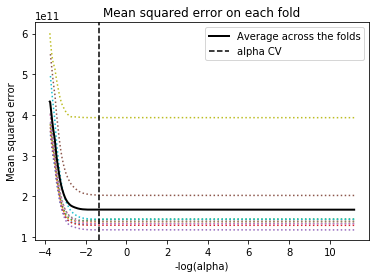

In [12]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_ , ':')
plt.plot(m_log_alphascv, model.mse_path_ .mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [13]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)


training data R-square
0.6296818126940176
test data R-square
0.6752103915771428


### Conclusion:

A lasso regression analysis was conducted to identify a subset of variables from a pool of explanatory predictors (categorical and quantitaive) variables that best predicted a quantitative response variable measuring price of a 2-bed room unit in Melbourne.

Categorical predictors included the type of the house (whether it is a house,cottage,villa, semi,terrace; unit, duplex; or  townhouse ), the method of the property is being sold (sold as usual, auction or passed down) as well as the region where the property is located.  Quantitative predictor variables including number of rooms,Distance, number of bedrooms, landsize,Number of carspots, bulding size, YearBuilt etc were also included. 

To faciliate ease of usage of LASSO regression later, all predictor variables were standardized to have a mean of zero and a standard deviation of one using a pre-processer and rows with null values are remove for simplicity.

Data were randomly split into a training set that included 70% of the observations and a validation set that included 30% of the observations. The least angle regression algorithm with k=10 fold cross validation was used to estimate the lasso regression model in the training set, and the model was validated using the test set. The change in the cross validation average (mean) squared error at each step was used to identify the best subset of predictor variables.


Based on the result generated from regression coefficient, 4 explanatory variables('Type_t','Method_SP','Regionname_Eastern) with extremely low regression coefficient were removed from the selected model while the remaning variables show equally strong association with our target variable here, which is the "price". The train data R-square is 0.62968 while test data R-square is 0.6752; which does not deviates much across train and test data. This can also be a sign that the model is not overlly underfit or overfit at the same time.